In [2]:
import numpy as np
from matplotlib import pyplot as plt
import keras

RANDOM_SEED = 0xdeadbeef

# Training Neural Networks

## Task 1: Backpropagation

In this task the goal is to compute the partial derivative of the cost function for one of the model parameters of the neural network we also saw in the lecture.

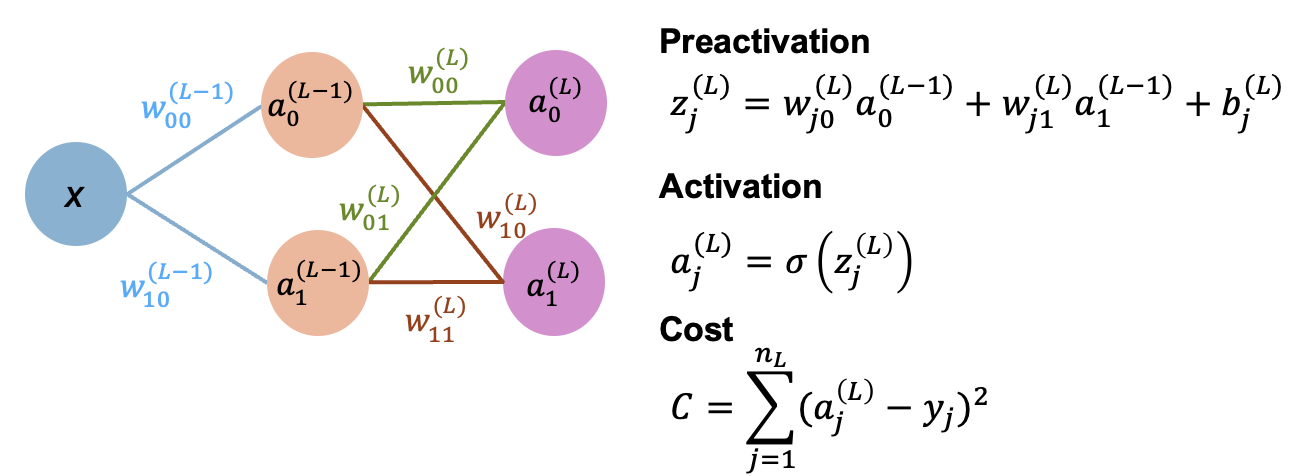

In the figure above, you see the feed-forward neural network. It has one input node $x$, one hidden layer with two hidden nodes, and two output nodes denoted $a_0^{(L)}$ and $a_1^{(L)}$. The activation function is denoted by $\sigma$. As we did in the lecture, in your derivations you can use $\sigma'$ to denote the derivative of the activation function. The cost/loss function $C$ is the squared error.

> **Note:** that the biases are not depicted in the image.

The goal of training a neural network is to find good values for its model parameters (weights and biases) such that it yields good quality predictions.
One common method to achieve this is *Gradient Descent*. To apply gradient descent, we need to compute the derivatives of our network with respect to its model parameters.

### Task 1

Compute $\frac{∂{C}}{\partial{w_{10}^{(L-1)}}}$

## 📢 **HAND-IN** 📢: in Moodle

No hand-in for this task.

<hr />

# Task 2: Keras (4 Points)

In this task we will revisit [keras](https://keras.io).
We will work with the MNIST hand-written digit recognition dataset. In the first part we describe in detail how the neural network is set up. Later on you will train the network using some of the strategies we saw in the lecture to address overfitting.

In the next cell we load the MNIST data and do some data preprocessing.

In [3]:
from keras.datasets import mnist

# download official train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# the original image data are 8bit integers, we normalize them to floats in [0., 1.]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# the original labels are the digits 0-9
# that means an image of a written "0" has label 0.
# here we transform these to so-called one-hot vectors
# the one-hot vector has 10 dimensions (one for each class)
# and is all 0 except for the dimension corresponding to the label
# for example, label 2 would be encoded as [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
# this conversion is necessary for training with keras
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

print("train samples: ", x_train.shape[0])
print("test samples: ", x_test.shape[0])

print("shape of one sample: ", x_train[0].shape)

train samples:  60000
test samples:  10000
shape of one sample:  (28, 28)


Here we visualize the first few training samples:

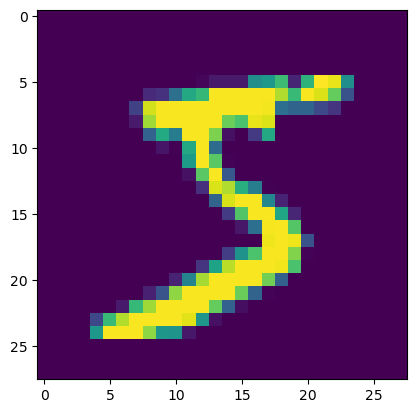

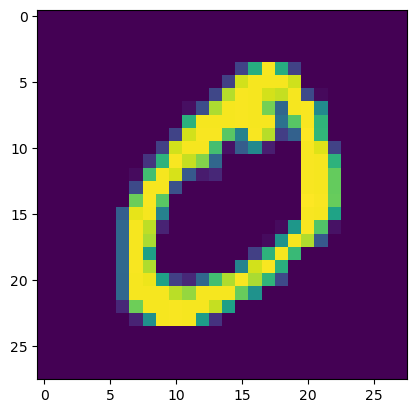

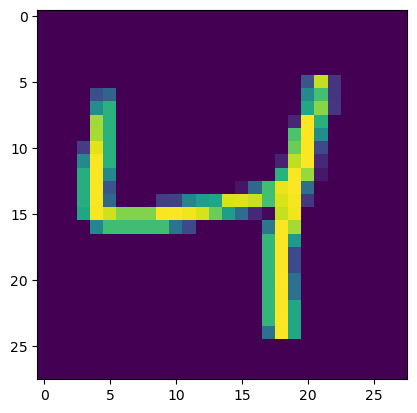

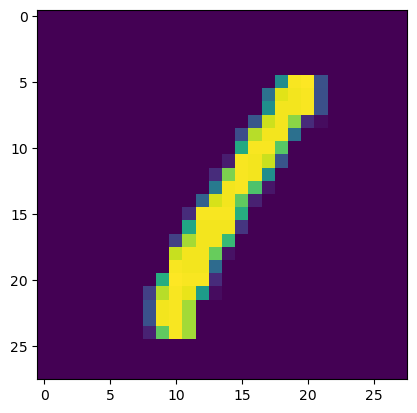

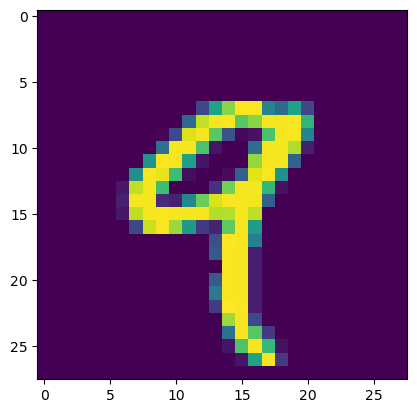

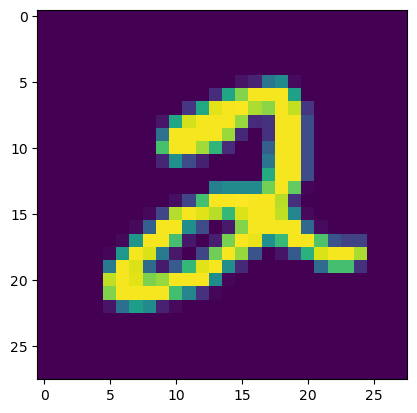

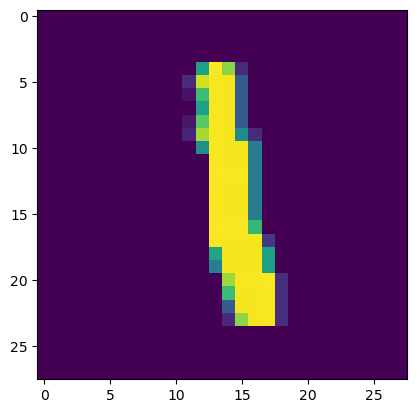

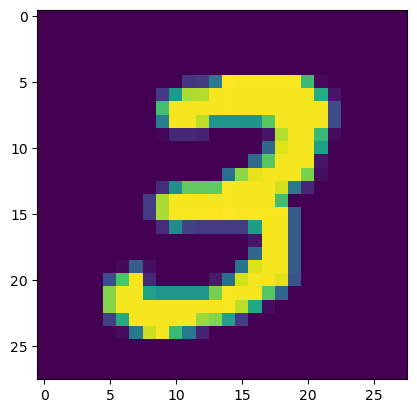

In [4]:
for i in range(8):
  plt.imshow(x_train[i, :, :])
  plt.show()

In the next cell, we define a simple feed-forward neural network.

Here are some differences compared to last week:

We do not use separate `Activation` layers, but instead specify the activation function in the layer directly using the keyword argument `activation` of the `Dense` layers.

We explicitely define the shape of the input using an `Input` layer. The MNIST images are all 28 pixels wide and 28 pixels high. We will flatten the images and treat them as 28x28 = 784 dimensional vectors. This is achieved by the `Flatten` layer.

We use 10 output nodes, since we have 10 classes. The output layer uses softmax activation (as explained in the lecture) since we are addressing a classification problem.

In [5]:
from keras.models import Sequential
from keras.layers import Input, Flatten, Dense

model = Sequential()
model.add(Input(shape=(28, 28)))  # define input shape, here 28x28 images
model.add(Flatten())              # flatten 28x28 images to 784-dimensional vectors
model.add(Dense(128, activation="relu"))    # hidden layer with 128 nodes and relu activation
model.add(Dense(10, activation="softmax"))  # output layer with 10 nodes (for the 10 classes) and softmax activation

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In the next cell, we prepare the model for training. Since we have a multiclass classification task, we specify `"categorical_crossentropy"` as our loss function. We will use `optimizer="sgd"` to train the network using stochastic gradient descent, and report accuracy.

In [6]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In the next cell, we fit the model on our training data. We use `batch_size=16` and train for `epochs=20` epochs.

We additionally use the keyword argument `validation_split=.1`. This tells the training procedure to split the training data into two non-overlapping subsets, one containing 90% of the samples to be used for training, and another one containing 10% of the samples to be used for validation. Note that this is very similarly the scikit-learn `train_test_split` function in previous assignments.

During training, keras will report loss and accuracy on both the training and validation split for each epoch and store them in the history output object.

In [7]:
history = model.fit(
  x_train,
  y_train,
  batch_size=16,
  epochs=20,
  validation_split=.1,
)

Epoch 1/20
 324/3375 [=>............................] - ETA: 1s - loss: 1.3940 - accuracy: 0.6439

3375/3375 [==============================] - 2s 636us/step - loss: 0.5215 - accuracy: 0.8613 - val_loss: 0.2633 - val_accuracy: 0.9263
Epoch 2/20
3375/3375 [==============================] - 2s 596us/step - loss: 0.2899 - accuracy: 0.9178 - val_loss: 0.2149 - val_accuracy: 0.9385
Epoch 3/20
3375/3375 [==============================] - 2s 590us/step - loss: 0.2425 - accuracy: 0.9307 - val_loss: 0.1845 - val_accuracy: 0.9487
Epoch 4/20
3375/3375 [==============================] - 2s 586us/step - loss: 0.2109 - accuracy: 0.9393 - val_loss: 0.1644 - val_accuracy: 0.9567
Epoch 5/20
3375/3375 [==============================] - 2s 581us/step - loss: 0.1873 - accuracy: 0.9477 - val_loss: 0.1485 - val_accuracy: 0.9612
Epoch 6/20
3375/3375 [==============================] - 2s 598us/step - loss: 0.1679 - accuracy: 0.9526 - val_loss: 0.1353 - val_accuracy: 0.9647
Epoch 7/20
3375/3375 [==============================] - 2s 589us/step - loss: 0.1527 - accuracy: 0.9575 - val_loss: 0.1279 - val_accura

In the next cell we provide a helper function to plot the training and validation losses.

In [8]:
def plot_history(history: keras.callbacks.History):
  """
  plot the training and validation loss for each training epoch

  history: a History object, output of the .fit method of a keras model
  """
  n = len(history.history['loss'])
  plt.plot(np.arange(n), history.history['loss'], label="training loss")
  plt.plot(np.arange(n), history.history['val_loss'], label="validation loss")
  plt.xticks(range(0, n + 1, 2))
  plt.legend()
  plt.grid()
  plt.show()

Next, we plot the learning curves:

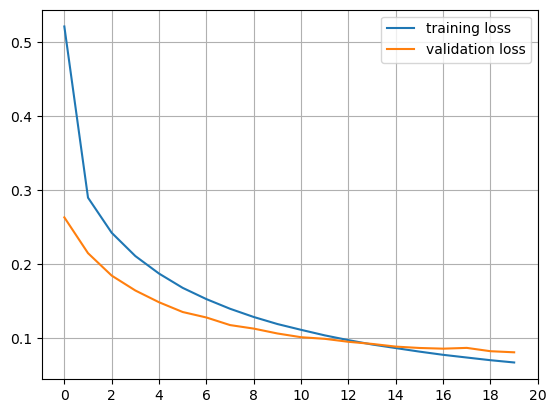

In [9]:
plot_history(history)

Finally, we can evaluate our model on the test data.

The `.evaluate` method takes the test samples and labels as input and returns a list of values.
The first entry in the list is the loss over the test data, the following values are the additional metrics that are defined in the `.compile` method.

In our case it will return the test loss and the accuracy on the test set.
You can also look into the `model.metrics_names` to check which value corresponds to which metric.

In [10]:
for m, v in zip(model.metrics_names, model.evaluate(x_test, y_test)):
  print(m, f"{v:.4f}")

313/313 [==============================] - 0s 507us/step - loss: 0.0881 - accuracy: 0.9734
loss 0.0881
accuracy 0.9734


### Task 2a. Add a Dropout layer

In the next cell, we redefine the same model as above. Your task is to add a `Dropout` layer. The main argument for the dropout layer is `rate` which defines the fraction of nodes that should be dropped. For example `Dropout(rate=0.5)` would drop exactly half of the nodes every time.

> **Note:** If you ever use another framework than keras, their dropout implementation might be defined such that you specify the fraction of nodes to keep.

**Task**: add a `Dropout` layer after the hidden layer and set an appropriate `rate` parameter.

In [11]:
from keras.layers import Dropout

# TODO: add a Dropout layer

model_dropout = Sequential()
model_dropout.add(Input(shape=(28, 28)))
model_dropout.add(Flatten())
model_dropout.add(Dense(128, activation="relu"))
model_dropout.add(Dropout(rate=0.2))
model_dropout.add(Dense(10, activation="softmax"))

model_dropout.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Below, we train the model in the same way as before.

In [12]:
model_dropout.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model_dropout.fit(
  x_train,
  y_train,
  batch_size=16,
  epochs=20,
  validation_split=.1,
)

Epoch 1/20
 404/3375 [==>...........................] - ETA: 2s - loss: 1.4071 - accuracy: 0.5998

3375/3375 [==============================] - 2s 675us/step - loss: 0.5942 - accuracy: 0.8302 - val_loss: 0.2652 - val_accuracy: 0.9288
Epoch 2/20
3375/3375 [==============================] - 2s 609us/step - loss: 0.3268 - accuracy: 0.9069 - val_loss: 0.2103 - val_accuracy: 0.9432
Epoch 3/20
3375/3375 [==============================] - 2s 614us/step - loss: 0.2689 - accuracy: 0.9236 - val_loss: 0.1784 - val_accuracy: 0.9522
Epoch 4/20
3375/3375 [==============================] - 2s 608us/step - loss: 0.2356 - accuracy: 0.9332 - val_loss: 0.1567 - val_accuracy: 0.9608
Epoch 5/20
3375/3375 [==============================] - 2s 628us/step - loss: 0.2078 - accuracy: 0.9402 - val_loss: 0.1419 - val_accuracy: 0.9637
Epoch 6/20
3375/3375 [==============================] - 2s 638us/step - loss: 0.1897 - accuracy: 0.9456 - val_loss: 0.1307 - val_accuracy: 0.9667
Epoch 7/20
3375/3375 [==============================] - 2s 669us/step - loss: 0.1752 - accuracy: 0.9496 - val_loss: 0.1198 - val_accura

Once the model is trained we can plot the learning curve of the model with dropout.

**Task**: Compare the learning curves to the model without dropout. What changed? Why?

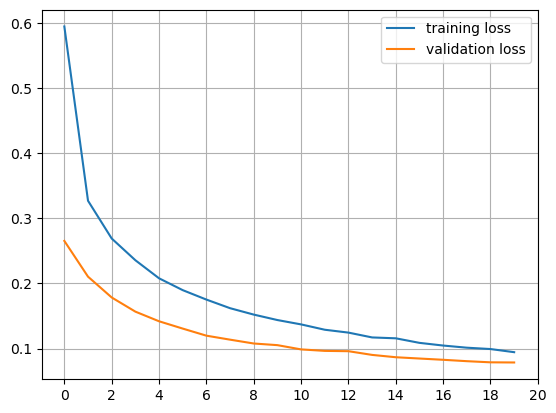

In [13]:
plot_history(history)

Finally, we can evaluate our model with dropout on the test data.

In [14]:
for m, v in zip(model_dropout.metrics_names, model_dropout.evaluate(x_test, y_test)):
  print(m, f"{v:.4f}")
  

# What difference did you observe to the learning curves without dropout and why?
# The validation loss is much lower than the training loss. This is because of the dropout layer. The dropout layer is only active during training, not during testing. This means that during training, the network is forced to learn to make predictions even if some of the nodes are missing. During testing, all nodes are active and the network can make better predictions. This is why the validation loss is lower than the training loss.

313/313 [==============================] - 0s 491us/step - loss: 0.0852 - accuracy: 0.9727
loss 0.0852
accuracy 0.9727


### Task 2b. Early Stopping "by hand"

In this task we will again consider the intial model without dropout. We will again plot the learning curves. Your task will be to study the learning curve and decide whether early stopping makes sense and determine at which epoch we should stop.

In the next cell, we rerun the training of our initial model without dropout. We use a few more epochs this time.

**Note** that this might take a little longer to run.

In [15]:
# define same model, without dropout again
model = Sequential()
model.add(Input(shape=(28, 28)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

# note: we use more epochs for this task
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model.fit(
  x_train,
  y_train,
  batch_size=16,
  epochs=40,
  validation_split=.1,
)


Epoch 1/40
   1/3375 [..............................] - ETA: 5:17 - loss: 2.3459 - accuracy: 0.1250

3375/3375 [==============================] - 2s 635us/step - loss: 0.5239 - accuracy: 0.8615 - val_loss: 0.2668 - val_accuracy: 0.9272
Epoch 2/40
3375/3375 [==============================] - 2s 603us/step - loss: 0.2935 - accuracy: 0.9173 - val_loss: 0.2124 - val_accuracy: 0.9425
Epoch 3/40
3375/3375 [==============================] - 2s 596us/step - loss: 0.2462 - accuracy: 0.9306 - val_loss: 0.1844 - val_accuracy: 0.9513
Epoch 4/40
3375/3375 [==============================] - 2s 601us/step - loss: 0.2130 - accuracy: 0.9401 - val_loss: 0.1650 - val_accuracy: 0.9567
Epoch 5/40
3375/3375 [==============================] - 2s 598us/step - loss: 0.1885 - accuracy: 0.9473 - val_loss: 0.1500 - val_accuracy: 0.9607
Epoch 6/40
3375/3375 [==============================] - 2s 599us/step - loss: 0.1690 - accuracy: 0.9515 - val_loss: 0.1379 - val_accuracy: 0.9640
Epoch 7/40
3375/3375 [==============================] - 2s 600us/step - loss: 0.1527 - accuracy: 0.9568 - val_loss: 0.1265 - val_accura

**Task** study the learning curves in the next plot. Does early stopping make sense? If so, at what epoch should we have stopped and why?

> **Note** your solution will very likely look very different from that of your colleagues.

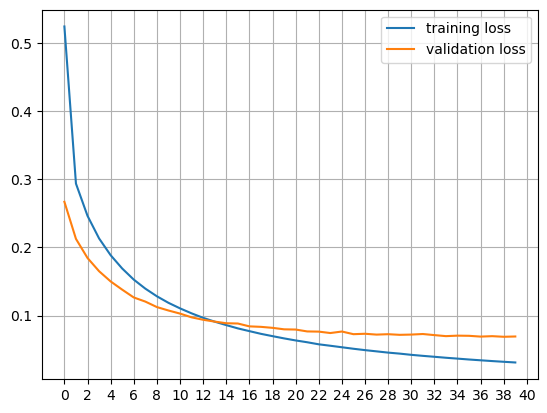

In [16]:
plot_history(history)
# should we use early stopoping?
# Yes, we should use early stopping. The validation loss starts to increase after epoch 10. This means that the model starts to overfit the training data. We should stop training at epoch 10.

# at what epoch would you stop?
# We should stop training at epoch 10.


## 📢 **HAND-IN** 📢: in Moodle
**Task 2a** (2 points):
* The learning curve plot for your model with dropout
* The dropout rate you used
* What difference did you observe to the learning curves without dropout and why?

**Task 2b** (2 points):
* The plot of the learning curve in Task 2b.
* Should we use early stopping?
* 
* If yes, at what epoch would you stop?


### FYI: Early Stopping in Keras

Keras provides an implementation of early stopping using the `EarlyStopping` class.

We can set parameters to control how early stopping is applied. The general idea is to stop training once a particular metric of interest does not improve anymore or even starts getting worse. We want to stop training once the validation loss does not decrease anymore for a while. For this we set `monitor="val_loss"` which means that the validation loss will be monitored. Since we want to stop once we achive a minimal validation loss, we set `mode="min"`. Finally, we set `patience=1` to tell it to stop training after the validation loss has not improved for 1 whole epoch.

The `EarlyStopping` instance is passed as a callback to the `.fit` method, using `callbacks=[early_stopping]`. Keras implements several functionalities using callbacks that run at the end of every epoch, early stopping being one of them.

Epoch 1/40
  75/3375 [..............................] - ETA: 2s - loss: 2.0449 - accuracy: 0.3858  

3375/3375 [==============================] - 2s 635us/step - loss: 0.5143 - accuracy: 0.8653 - val_loss: 0.2627 - val_accuracy: 0.9298
Epoch 2/40
3375/3375 [==============================] - 2s 612us/step - loss: 0.2911 - accuracy: 0.9182 - val_loss: 0.2216 - val_accuracy: 0.9378
Epoch 3/40
3375/3375 [==============================] - 2s 614us/step - loss: 0.2438 - accuracy: 0.9312 - val_loss: 0.1873 - val_accuracy: 0.9498
Epoch 4/40
3375/3375 [==============================] - 2s 621us/step - loss: 0.2121 - accuracy: 0.9401 - val_loss: 0.1646 - val_accuracy: 0.9562
Epoch 5/40
3375/3375 [==============================] - 2s 634us/step - loss: 0.1876 - accuracy: 0.9464 - val_loss: 0.1477 - val_accuracy: 0.9632
Epoch 6/40
3375/3375 [==============================] - 2s 631us/step - loss: 0.1680 - accuracy: 0.9517 - val_loss: 0.1353 - val_accuracy: 0.9643
Epoch 7/40
3375/3375 [==============================] - 2s 633us/step - loss: 0.1525 - accuracy: 0.9564 - val_loss: 0.1241 - val_accura

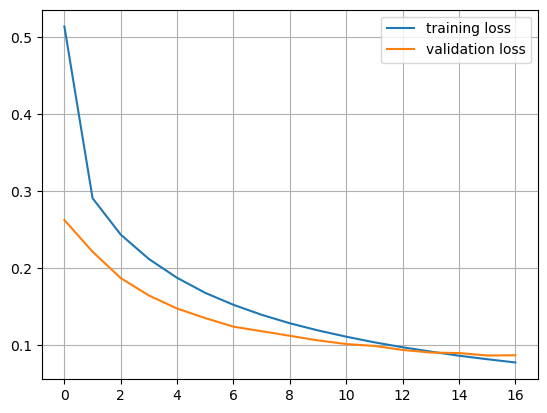

In [17]:
from keras.callbacks import EarlyStopping

# prepare our model
model = Sequential()
model.add(Input(shape=(28, 28)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

early_stopping = EarlyStopping(
    monitor="val_loss",
    mode="min",
    patience=1,
)

# note that we pass the early_stopping object as a callback here
history = model.fit(
  x_train,
  y_train,
  batch_size=16,
  epochs=40,
  validation_split=.1,
  callbacks=[early_stopping]
)

plot_history(history)


<hr />

# Task 3: Data Augmentation (2 Points)

In this task we will look at some image data augmentation methods that are implemented in keras.

In the next cell we prepare the data used for this task. We will use the first 8 samples from the MNIST training data.
As mentioned, the original MNIST images are 28x28 pixels and each pixel consists of 1 float value.
The keras image processing functions expect inputs with shape (width, height, channels) where channels usually is 3, corresponding to red, green, and blue.
We therefore have to reshape our images to have shape (28, 28, 1), we achieve this using `np.newaxis` when indexing the original data. Don't worry, you do not have to understand that last part.

In [18]:
# You don't have to fully understand this next line
X = x_train[:8, :, :, np.newaxis]

print("new data shape: ", X.shape)
print("number of samples: ", X.shape[0])
print("shape of an individual sample", X.shape[1:])

new data shape:  (8, 28, 28, 1)
number of samples:  8
shape of an individual sample (28, 28, 1)


In the next cell, we use several classes implementing various image augmentation strategies.

Since they all involve a degree of randomness, we can set their random seed using `seed=RANDOM_SEED`.

The first augmentation we can use is `RandomFlip`. As the name suggests, it will randomly flip a given input image. We can set `mode` to any of: `"horizontal"`, `"vertical"`, or `"horizontal_and_vertical"`.

Next, we can use `RandomRotation` which will rotate the input image by a random amount. The maximal angle of the rotation is defined by the `factor` parameter. It represents the maximal fraction of $2\pi$ that we will rotate in either direction. Since rotating an image can move certain pixels outside of the initial 28x28 grid and leave certain pixels empty, we have to define what to do with the empty space. We can define this by setting `fill_mode`. Here we chose `fill_mode="constant"` and a `fill_value=0.0` to fill empty pixels with 0. There are other fill-modes available.

The last augmentation we will look at is `RandomZoom`. It has both a `height_factor` and `width_factor` which defines how much we can zoom in or out in either dimension. We again provide `fill_mode="constant"` and `fill_value=0.0` for the same reasons as before.

**Task:** **Task:** Try out the different transformations one by one using different values of their parameters and inspect what each of them does. Which one of the three transformations does not make sense for the digit classification task?

Note that in the availeble code the values of parameters of the three augmentation layers have just some initial values that are mostly too extreme.

In [19]:
from keras.layers import RandomFlip, RandomRotation, RandomZoom

augmentation_layer = Sequential()
augmentation_layer.add(Input(shape=(28, 28, 1)))
augmentation_layer.add(RandomFlip(mode="horizontal_and_vertical", seed=RANDOM_SEED))
augmentation_layer.add(RandomRotation(factor=.5, seed=RANDOM_SEED, fill_mode="constant", fill_value=0.))
augmentation_layer.add(RandomZoom(height_factor=1., width_factor=1., fill_mode="constant", fill_value=0.))

In the next cell, we apply the augmentations to our samples. Note that we pass the parameter `training=True`, since data augmentation is only applied during training but not testing (similar to dropout).

In [20]:
x_aug = augmentation_layer(X, training=True)

In the next cell, there is code for plotting all 8 considered example images and their augmented versions and you can use it to inspect the results of each transformation.

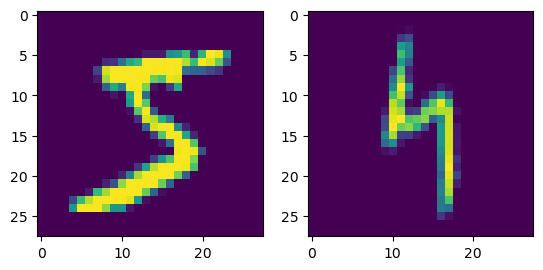

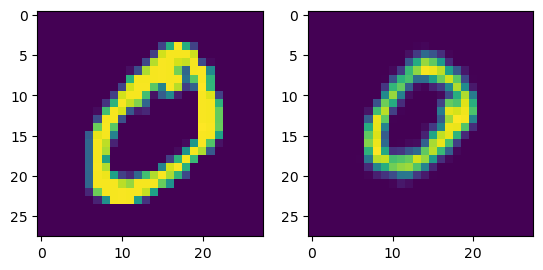

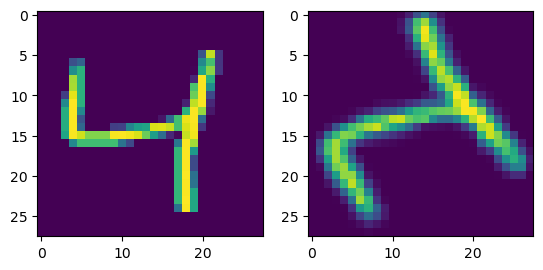

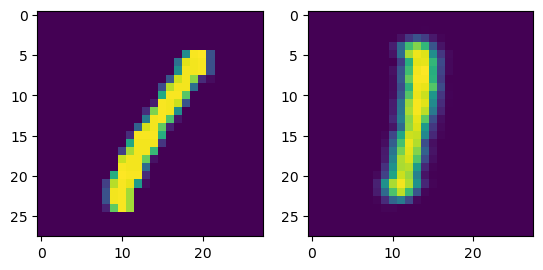

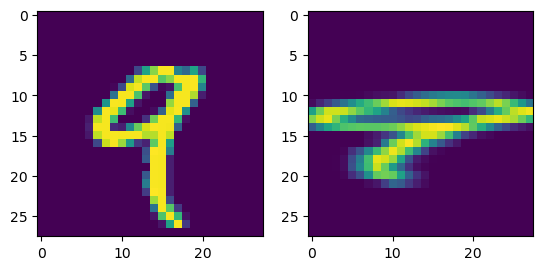

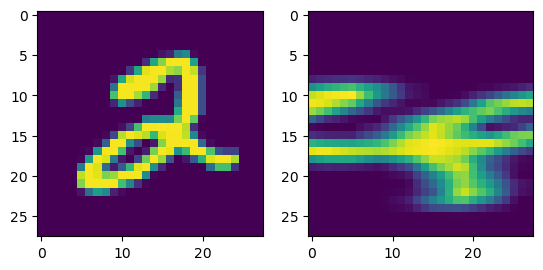

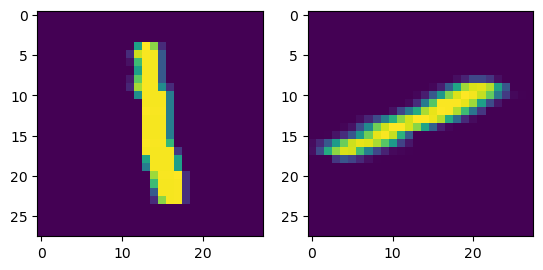

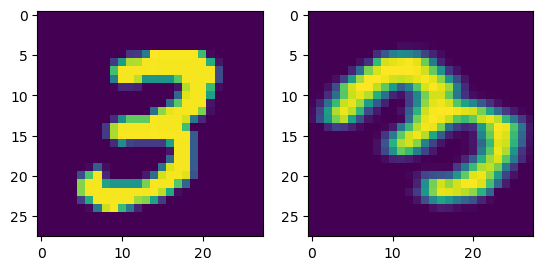

In [21]:
for i in range(8):
  ax1 = plt.subplot(1, 2, 1)
  ax1.imshow(X[i, :, :, 0])
  ax2 = plt.subplot(1, 2, 2)
  ax2.imshow(x_aug[i, :, :, 0])
  plt.show()

## 📢 **HAND-IN** 📢: in Moodle

Task 3 (2 points): Select the transformation that does not make sense for the digit classification task.

<hr />

## Task 4: The Deep End (4 Points)

In this task the goal is to predict the value of houses based on a set of available features. You are provided a dataset and you need to implement your own feed-forward neural network using keras.

The dataset we will use is the [Boston Housing Dataset](http://lib.stat.cmu.edu/datasets/boston). The goal is to predict the median value (worth) of houses in different areas around Boston based on 13 different features.

The full list and explanation of features is given below. The last entry, "MEDV", is our target variable.

Variables in order:
* CRIM     per capita crime rate by town
* ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS    proportion of non-retail business acres per town
* CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX      nitric oxides concentration (parts per 10 million)
* RM       average number of rooms per dwelling
* AGE      proportion of owner-occupied units built prior to 1940
* DIS      weighted distances to five Boston employment centres
* RAD      index of accessibility to radial highways
* TAX      full-value property-tax rate per \$10,000
* PTRATIO  pupil-teacher ratio by town
* B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT    % lower status of the population
* MEDV     Median value of owner-occupied homes in \$1000's

In [22]:
from keras.datasets import boston_housing

(x_trainNN, y_trainNN), (x_testNN, y_testNN) = boston_housing.load_data(test_split=.2, seed=RANDOM_SEED)

print("training samples: ", x_train.shape[0])
print("test samples: ", x_test.shape[0])

print("sample dimension: ", x_train.shape[1])

training samples:  60000
test samples:  10000
sample dimension:  28


### Task: Implement a Neural Network for the Boston Housing dataset using keras

Some general advice:

* you can a reuse a lot of the code from Task 2
* think about the type of problem you are solving (classification, regression, etc.) and choose the right loss function and performance metric(s)
* while the number of input and output nodes of your network are defined by the data itself, you are the designer of the number and sizes of the hidden layers
* if you run into issues, where the loss becomes `nan` you can try changing the activation function

**Show with the help of the learning (loss) curve that the model learned something.**

Epoch 1/2000


6/6 [==============================] - 0s 15ms/step - loss: 555.5511 - mae: 21.7336 - val_loss: 515.2158 - val_mae: 20.4247
Epoch 2/2000
6/6 [==============================] - 0s 4ms/step - loss: 381.4829 - mae: 17.5582 - val_loss: 246.5162 - val_mae: 13.0213
Epoch 3/2000
6/6 [==============================] - 0s 4ms/step - loss: 140.0272 - mae: 9.4928 - val_loss: 177.4274 - val_mae: 10.0273
Epoch 4/2000
6/6 [==============================] - 0s 4ms/step - loss: 105.4062 - mae: 7.7606 - val_loss: 85.2290 - val_mae: 6.4653
Epoch 5/2000
6/6 [==============================] - 0s 4ms/step - loss: 52.8149 - mae: 5.5355 - val_loss: 94.9109 - val_mae: 7.4148
Epoch 6/2000
6/6 [==============================] - 0s 4ms/step - loss: 43.2396 - mae: 5.0378 - val_loss: 57.1484 - val_mae: 5.1373
Epoch 7/2000
6/6 [==============================] - 0s 4ms/step - loss: 27.9127 - mae: 3.9788 - val_loss: 52.2177 - val_mae: 5.0314
Epoch 8/2000
6/6 [==============================] - 0s 4ms/step - loss: 21.0

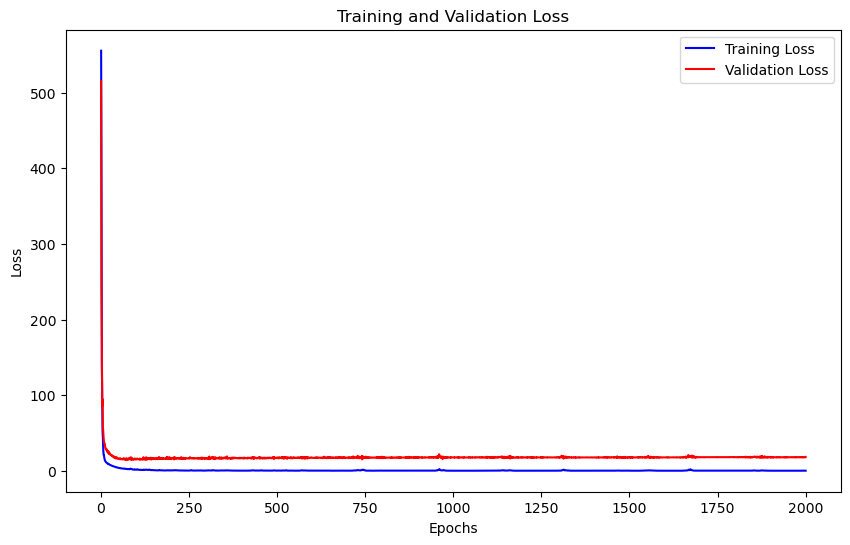

In [33]:


# Normalize the data
mean = x_trainNN.mean(axis=0)
std = x_trainNN.std(axis=0)
x_trainNN = (x_trainNN - mean) / std
x_testNN = (x_testNN - mean) / std

# Build the model
model = Sequential()
#model.add(Flatten())
model.add(Dense(200, activation='relu', input_shape=(x_trainNN.shape[1],)))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1))  # Output layer with a single node for regression

# Compile the model
# model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Mean Squared Error loss for regression
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# model.compile(optimizer='sgd', loss='mse')

# Train the model
# history = model.fit(x_trainNN, y_trainNN, epochs=100, batch_size=16, validation_split=0.2, verbose=0)
history = model.fit(x_trainNN, y_trainNN, epochs=2000, batch_size=50, validation_split=0.3, verbose=1)

# Evaluate the model
test_loss, test_mae = model.evaluate(x_testNN, y_testNN)
# test_loss = model.evaluate(x_testNN, y_testNN)

print(f"Test Mean Absolute Error: {test_mae}")

# Plotting the learning curve
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)



plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [24]:
## evaluate performance on test set here
# A description of the network you built
# What loss function and metric(s) you used and why you chose those
# The final performance you achieved on the test set
# A plot of your learning curve




## 📢 **HAND-IN** 📢: in **Moodle**

* A description of the network you built
* What loss function and metric(s) you used and why you chose those
* The final performance you achieved on the test set
* A plot of your learning curve
